In [1]:
import numpy as np
import pandas as pd
import os

data_path = os.path.abspath(os.path.join("2","..", "..","..", "data", "external","word-embeddings.feather"))

df = pd.read_feather(data_path)  

In [2]:
string_array = np.array(df['vit'].tolist())  

print(string_array.shape)

(200, 512)


### CheckPCA functionality

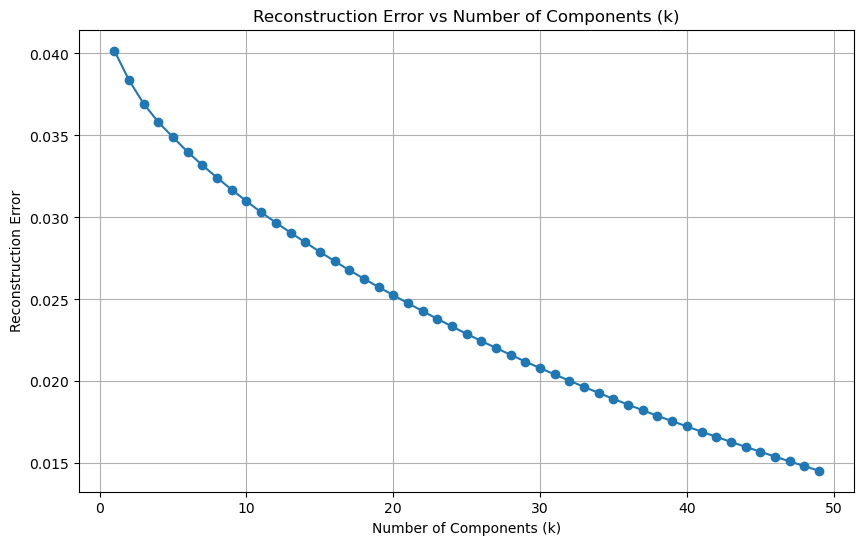

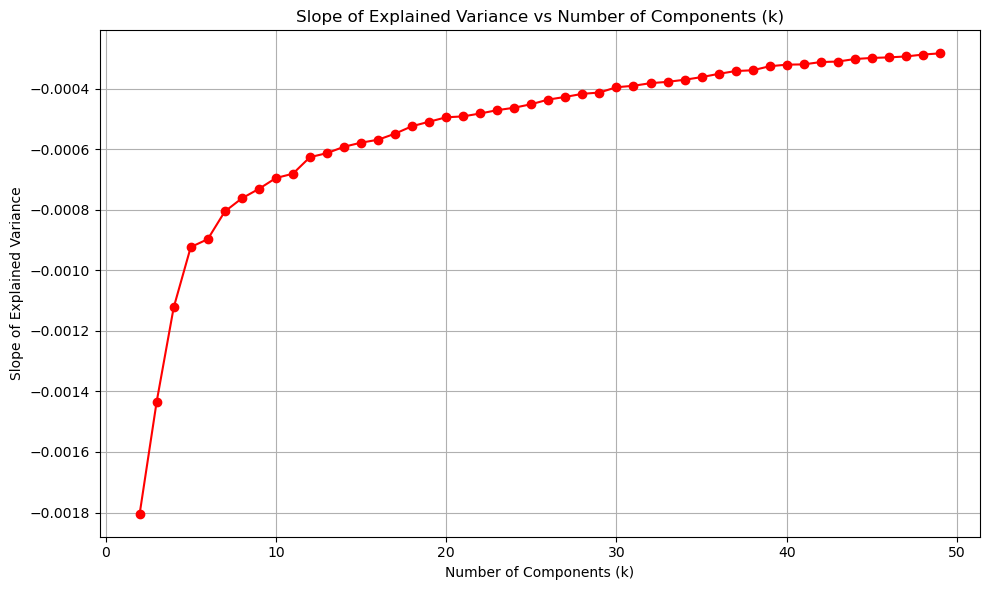

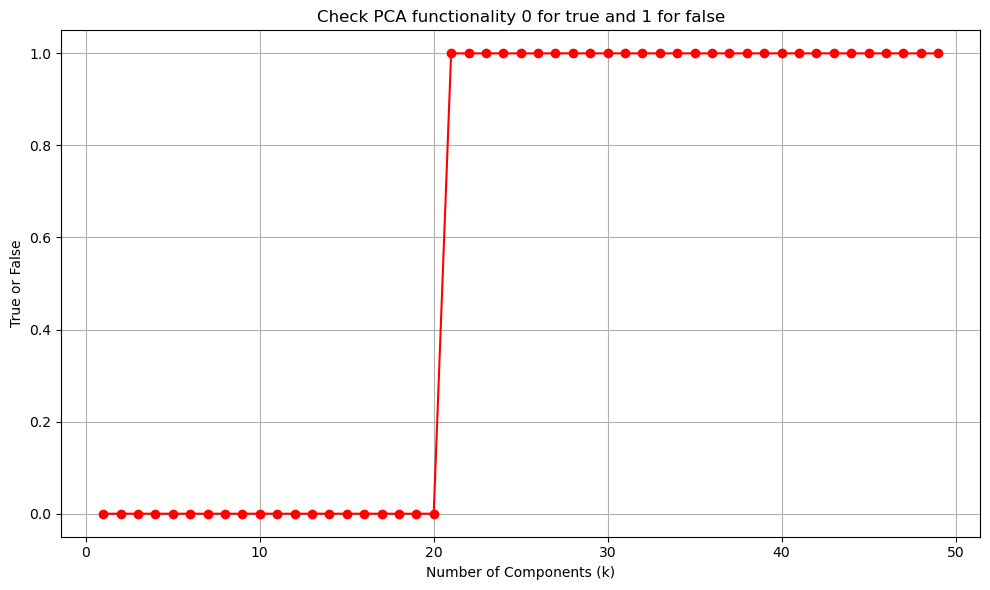

In [7]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))  
import matplotlib.pyplot as plt
from models.PCA.PCA import PCA
import numpy as np

reconstruction_errors = []
verify_checkpca = []

for k in range(1, 50):
    n_components = k
    pca = PCA(n_components=n_components)
    
    pca.fit(string_array)
    
    if(pca.checkPCA(string_array)):
        verify_checkpca.append(1)
    else:
        verify_checkpca.append(0)
    
    reconstruction_errors.append(pca.reconstruction_error)

slopes = np.diff(reconstruction_errors)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), reconstruction_errors, marker='o')
plt.title('Reconstruction Error vs Number of Components (k)')
plt.xlabel('Number of Components (k)')
plt.ylabel('Reconstruction Error')
plt.grid(True)
plt.savefig('plots/5_main_reconstruction_error_PCA.png')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(2, 50), slopes, marker='o', color='r')
plt.title('Slope of Explained Variance vs Number of Components (k)')
plt.xlabel('Number of Components (k)')
plt.ylabel('Slope of Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/5_main_slope_PCA.png')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), verify_checkpca, marker='o', color='r')
plt.title('Check PCA functionality 0 for true and 1 for false')
plt.xlabel('Number of Components (k)')
plt.ylabel('True or False')
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/5_main_slope_PCA.png')
plt.show()

(512,)


/tmp/ipykernel_53725/2909052162.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  importance  = importance.astype(float)


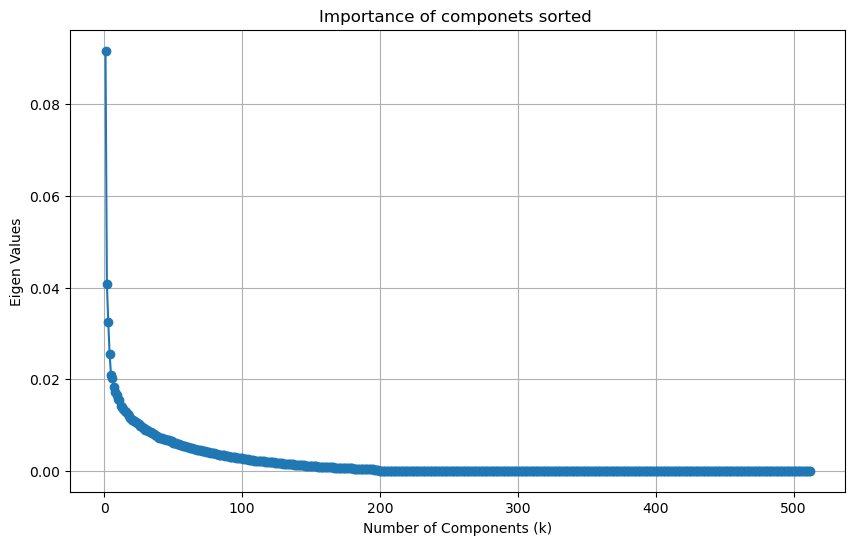

True

In [4]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))  
import matplotlib.pyplot as plt
from models.PCA.PCA import PCA
import numpy as np


n_components = 25

pca = PCA(n_components=n_components)

pca.fit(string_array)

importance = pca.ret_importance()
importance  = importance.astype(float)
print(importance.shape)
# for value in importance:
#     print(value)

imporatnce = np.argsort(importance)
np.argsort(importance)
importance = np.real(importance)
# temp = []

# temp = np.array(temp)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 513), importance, marker='o')
plt.title('Importance of componets sorted ')
plt.xlabel('Number of Components (k)')
plt.ylabel('Eigen Values')
plt.grid(True)
plt.savefig('plots/5_main_eigen_value+importance.png')
plt.show()


pca.checkPCA(string_array)

### Reduction to 2D and 3D data

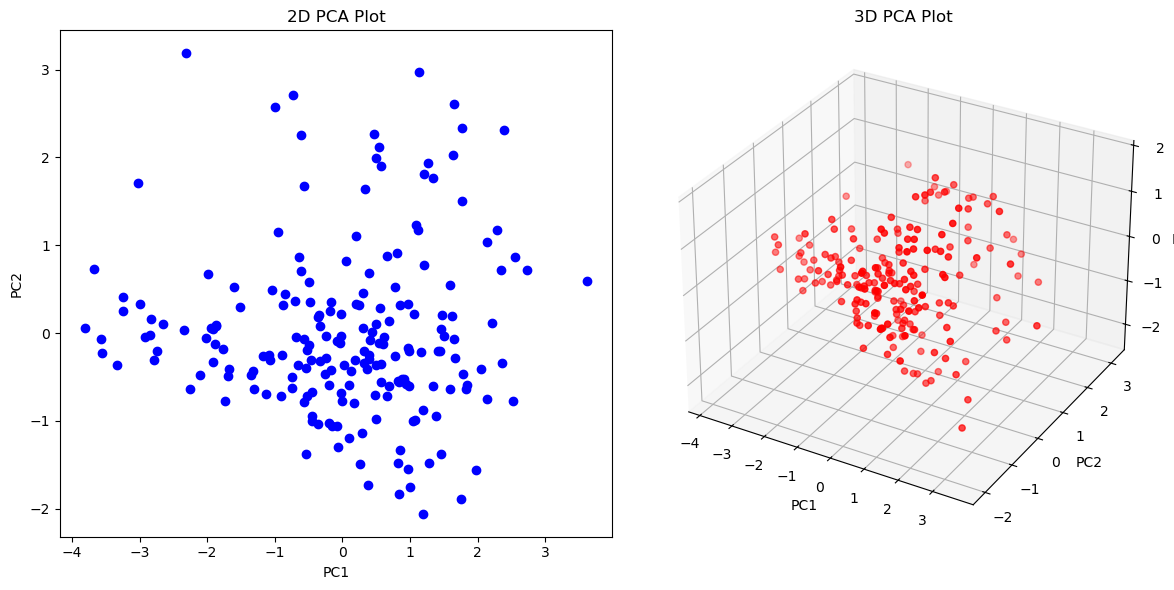

In [5]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from models.PCA.PCA import PCA

n_components = 3

pca = PCA(n_components=n_components)

pca.fit(string_array)

# Transform data for 2D and 3D
two_d = pca.transform(string_array)[:, :2]
three_d = pca.transform(string_array) 

two_d = np.real(two_d)
three_d = np.real(three_d)

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121) 
ax1.scatter(two_d[:, 0], two_d[:, 1], color='b')
ax1.set_title('2D PCA Plot')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')

ax2 = fig.add_subplot(122, projection='3d') 
ax2.scatter(three_d[:, 0], three_d[:, 1], three_d[:, 2], color='r')
ax2.set_title('3D PCA Plot')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

plt.tight_layout()
plt.savefig('plots/5_main_2D_3D_PCA.png')
plt.show()


#### From observation I can see four clusters so k2 = 3